<a href="https://colab.research.google.com/github/RonaldDonfack/Bole/blob/main/titanic_analysis_yanel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our training and testing datasets.

In [9]:
# Import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Load the data
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
train_df.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Exploratory Data Analysis (EDA)

Now, let's explore the data to understand its structure, find patterns, and identify missing values.


Missing values:
 Cabin       687
Age         177
Embarked      2
dtype: int64


/tmp/ipython-input-4225891644.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train_df, palette="coolwarm")


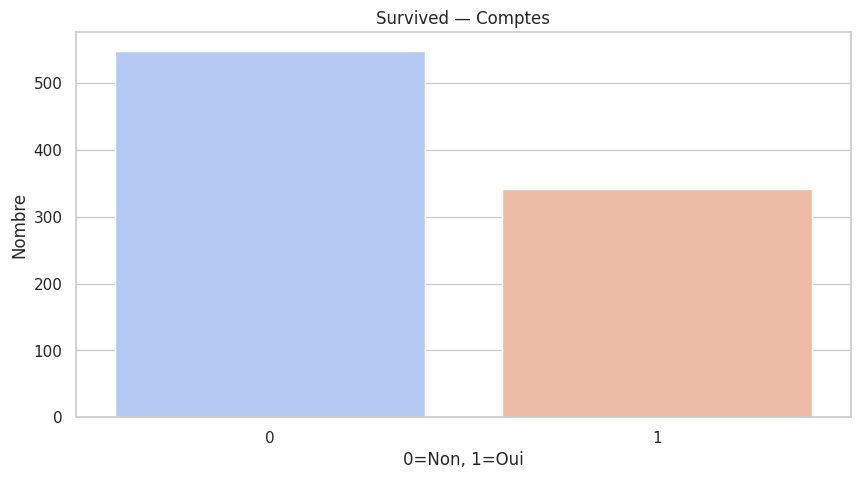

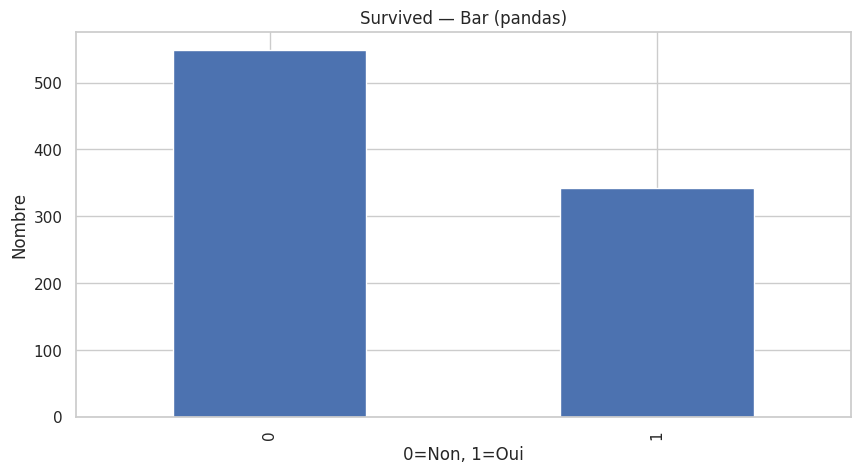

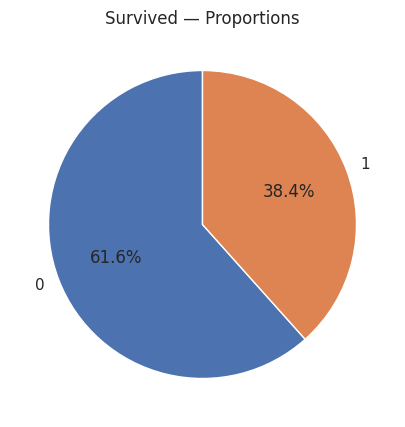

/tmp/ipython-input-4225891644.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=train_df, palette="Set2")


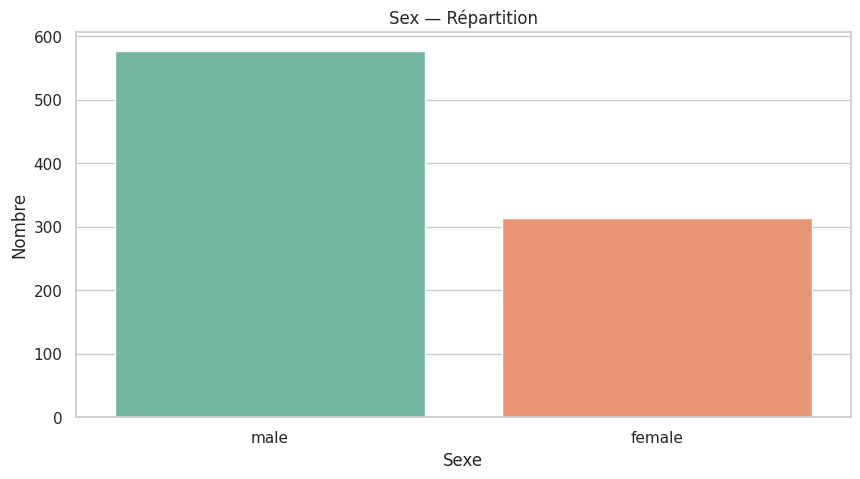

/tmp/ipython-input-4225891644.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train_df, palette="Set2", errorbar=None)


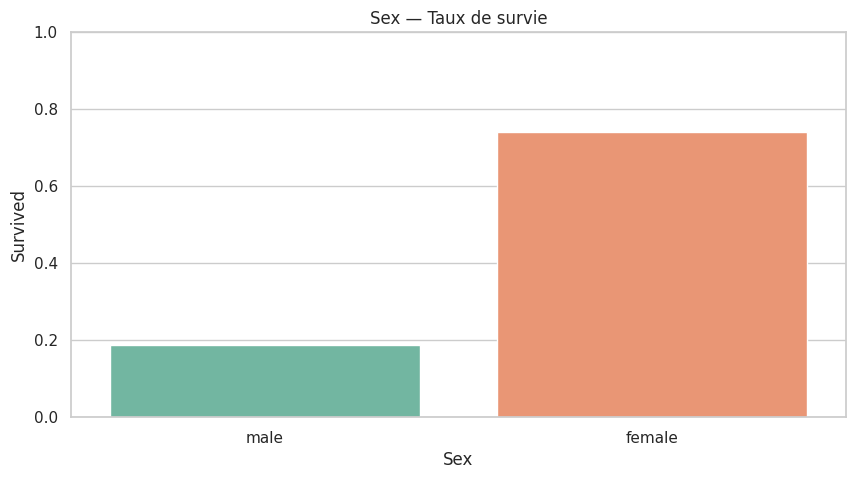

/tmp/ipython-input-4225891644.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=train_df, palette="Set2")


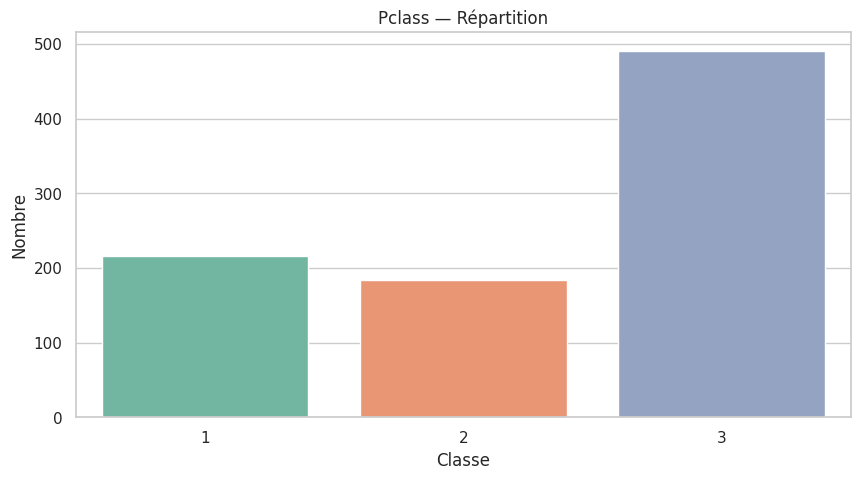

/tmp/ipython-input-4225891644.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_df, palette="Set2", errorbar=None)


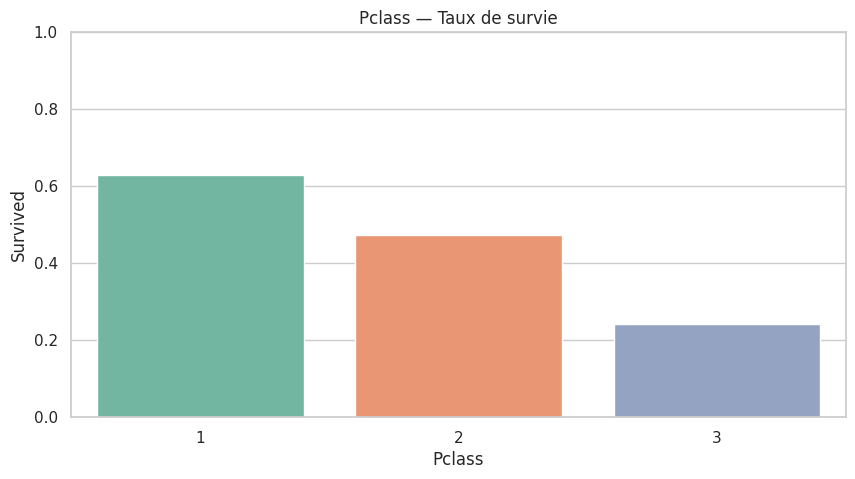

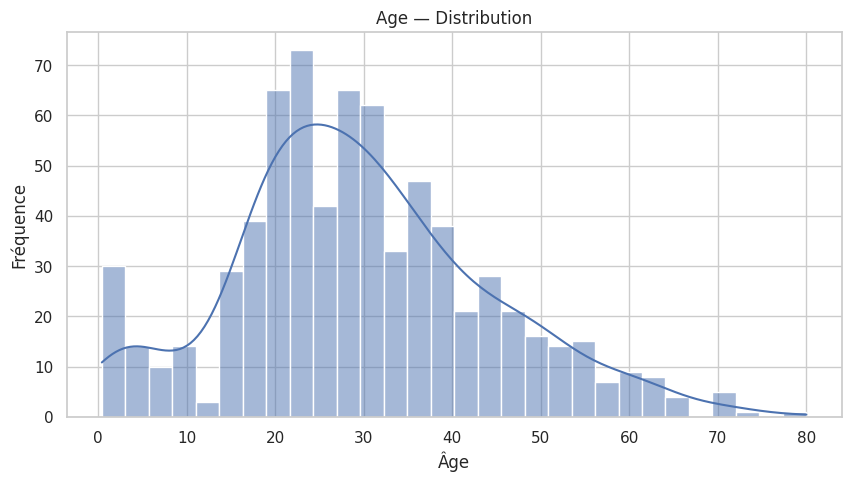

/tmp/ipython-input-4225891644.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=train_df, palette="coolwarm")


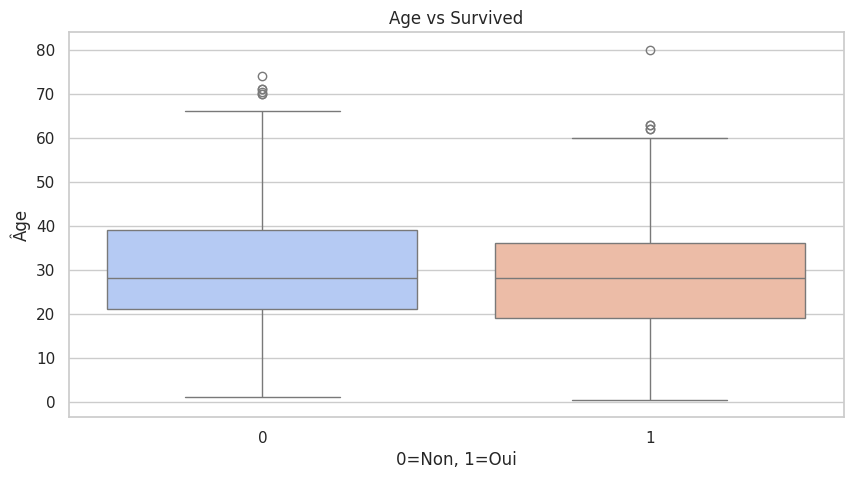

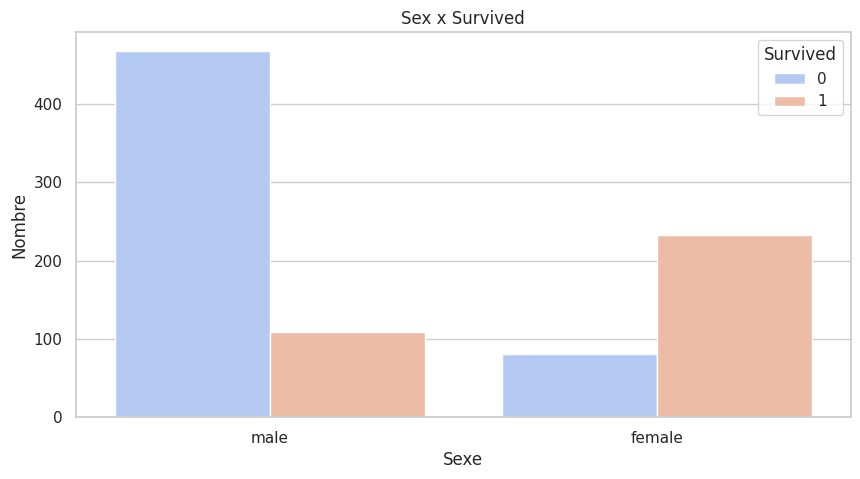

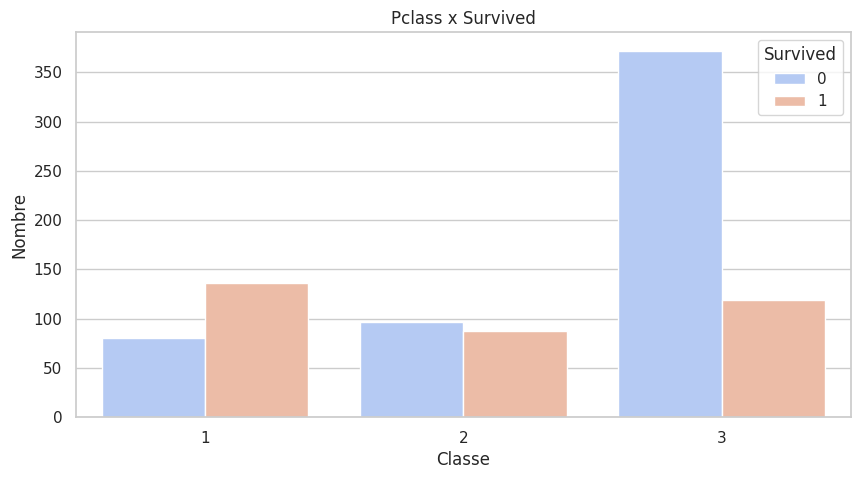

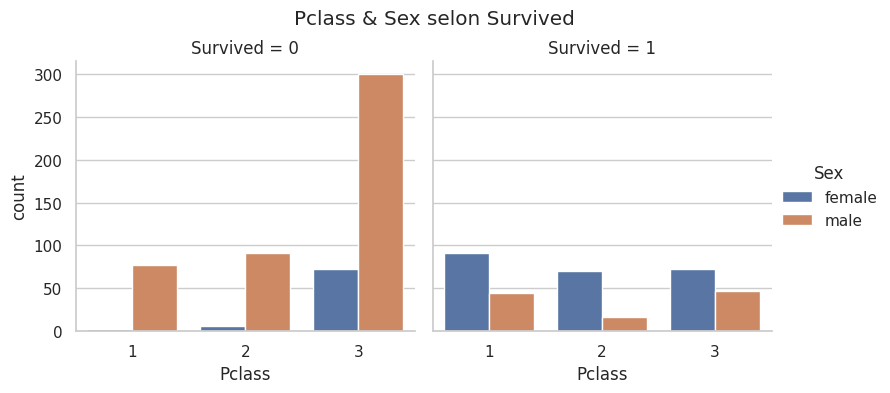

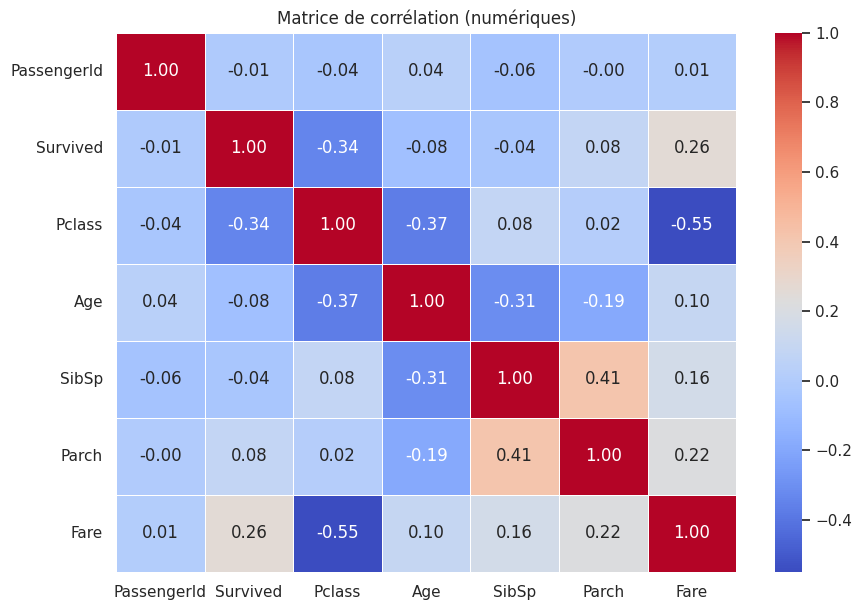

,Survived,Sex,Pclass,Age,Fare,FamilySize,IsAlone,Cabin_known,AgeBin
0,0,male,3,22.0,7.2500,2,0,0,young
1,1,female,1,38.0,71.2833,2,0,1,adult
2,1,female,3,26.0,7.9250,1,1,0,young
3,1,female,1,35.0,53.1000,2,0,1,young
4,0,male,3,35.0,8.0500,1,1,0,young


In [44]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)



# --- 2) Valeurs manquantes (table courte)
missing = train_df.isna().sum().sort_values(ascending=False)
print("\nMissing values:\n", missing[missing > 0])

# --- 3) Survived — distribution (coolwarm = binaire avec sens)
plt.figure()
sns.countplot(x="Survived", data=train_df, palette="coolwarm")
plt.title("Survived — Comptes"); plt.xlabel("0=Non, 1=Oui"); plt.ylabel("Nombre"); plt.show()

plt.figure()
train_df["Survived"].value_counts().sort_index().plot(kind="bar")
plt.title("Survived — Bar (pandas)"); plt.xlabel("0=Non, 1=Oui"); plt.ylabel("Nombre"); plt.show()

plt.figure()
train_df["Survived"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Survived — Proportions"); plt.ylabel(""); plt.show()

# --- 4) Sex — répartition & taux de survie (Set2 = qualitative)
plt.figure()
sns.countplot(x="Sex", data=train_df, palette="Set2")
plt.title("Sex — Répartition"); plt.xlabel("Sexe"); plt.ylabel("Nombre"); plt.show()

plt.figure()
sns.barplot(x="Sex", y="Survived", data=train_df, palette="Set2", errorbar=None)
plt.title("Sex — Taux de survie"); plt.ylim(0,1); plt.show()

# --- 5) Pclass — répartition & taux de survie (Set2 = qualitative)
plt.figure()
sns.countplot(x="Pclass", data=train_df, palette="Set2")
plt.title("Pclass — Répartition"); plt.xlabel("Classe"); plt.ylabel("Nombre"); plt.show()

plt.figure()
sns.barplot(x="Pclass", y="Survived", data=train_df, palette="Set2", errorbar=None)
plt.title("Pclass — Taux de survie"); plt.ylim(0,1); plt.show()

# --- 6) Age — distribution & relation avec survie
plt.figure()
sns.histplot(train_df["Age"], bins=30, kde=True)
plt.title("Age — Distribution"); plt.xlabel("Âge"); plt.ylabel("Fréquence"); plt.show()

plt.figure()
sns.boxplot(x="Survived", y="Age", data=train_df, palette="coolwarm")
plt.title("Age vs Survived"); plt.xlabel("0=Non, 1=Oui"); plt.ylabel("Âge"); plt.show()

# --- 7) Croisements rapides (Sex x Survived, Pclass x Survived)
plt.figure()
sns.countplot(x="Sex", hue="Survived", data=train_df, palette="coolwarm")
plt.title("Sex x Survived"); plt.xlabel("Sexe"); plt.ylabel("Nombre"); plt.show()

plt.figure()
sns.countplot(x="Pclass", hue="Survived", data=train_df, palette="coolwarm")
plt.title("Pclass x Survived"); plt.xlabel("Classe"); plt.ylabel("Nombre"); plt.show()

# Variante synthétique : grille (classe, sexe) par survie
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train_df, kind="count", height=4, aspect=1)
plt.subplots_adjust(top=0.85); plt.suptitle("Pclass & Sex selon Survived"); plt.show()

# --- 8) Corrélations numériques (inclut Survived)
num = train_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(num.corr(), annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm")
plt.title("Matrice de corrélation (numériques)"); plt.show()

# --- 9) (Optionnel) Features utiles pour la suite modèle
train_df["Cabin_known"] = train_df["Cabin"].notna().astype(int)
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df["IsAlone"] = (train_df["FamilySize"] == 1).astype(int)
train_df["AgeBin"] = pd.cut(train_df["Age"], bins=[-1,12,18,35,50,80],
                            labels=["child","teen","young","adult","senior"])
display(train_df[["Survived","Sex","Pclass","Age","Fare","FamilySize","IsAlone","Cabin_known","AgeBin"]].head())


## 3. Data Cleaning & Feature Engineering

Based on our EDA, we'll clean the data by handling missing values and create new features to improve our model's performance.

In [18]:
# === 3) DATA CLEANING & FEATURE ENGINEERING (advanced, RF-ready) ===
import os, pandas as pd, numpy as np

# -- Charger train/test si absents en mémoire
if 'train_df' not in locals():
    path_train = "train.csv" if os.path.exists("train.csv") else "/content/drive/MyDrive/train.csv"
    train_df = pd.read_csv(path_train)
if 'test_df' not in locals():
    path_test = "test.csv" if os.path.exists("test.csv") else "/content/drive/MyDrive/test.csv"
    test_df = pd.read_csv(path_test)

# -- Concat pour construire des features cohérentes (sans fuiter la cible)
train = train_df.copy()
test  = test_df.copy()
train["is_train"] = 1
test["is_train"]  = 0
test["Survived"]  = np.nan
full = pd.concat([train, test], ignore_index=True)

# -- Title (normalisation) + titres rares
full["Title"] = full["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
full["Title"] = full["Title"].replace({"Mlle":"Miss", "Mme":"Mrs"})
RARE_TITLES = ["Dr","Rev","Col","Major","Countess","Ms","Lady","Jonkheer","Don","Dona","Sir","Capt"]
full["Title"] = full["Title"].replace(RARE_TITLES, "Rare")

# -- Family features
full["FamilySize"] = full["SibSp"] + full["Parch"] + 1
full["IsAlone"]    = (full["FamilySize"] == 1).astype(int)

# -- Ticket group size
ticket_counts = full["Ticket"].value_counts()
full["TicketGroupSize"] = full["Ticket"].map(ticket_counts).astype(int)

# -- Cabin deck (première lettre, U si inconnu)
full["CabinDeck"] = full["Cabin"].str[0].fillna("U")

# -- Imputations simples
full["Embarked"] = full["Embarked"].fillna(full["Embarked"].mode()[0])
full["Fare"]     = full["Fare"].fillna(full["Fare"].median())

# -- Age imputé par groupe (Title × Pclass × Sex)
full["SexBin"] = full["Sex"].map({"male":0, "female":1}).astype(int)
grp_age = full.groupby(["Title","Pclass","SexBin"])["Age"].median()
def impute_age(row):
    if pd.isna(row["Age"]):
        try:
            return grp_age.loc[row["Title"], row["Pclass"], row["SexBin"]]
        except KeyError:
            return full["Age"].median()
    return row["Age"]
full["Age"] = full.apply(impute_age, axis=1)

# -- Features dérivées utiles
full["FarePerPerson"] = (full["Fare"] / full["FamilySize"]).astype(float)
full["Child"]  = (full["Age"] < 16).astype(int)
full["Mother"] = ((full["Sex"]=="female") & (full["Parch"]>0) & (full["Age"]>18) & (full["Title"]!="Miss")).astype(int)
full["SexPclass"] = full["SexBin"] * full["Pclass"]

# -- Encodages one-hot
full = pd.get_dummies(full,
                      columns=["Embarked","Title","CabinDeck"],
                      prefix=["Emb","Title","Deck"],
                      drop_first=True)

# -- Matrice finale numérique (on ne garde PAS ces colonnes brutes)
drop_cols = ["Name","Ticket","Cabin","PassengerId","Survived","Sex"]  # on enlèvera aussi 'is_train' juste après split
X_all = full.drop(columns=[c for c in drop_cols if c in full.columns], errors="ignore")

# -- Split back en train/test features
mask_train = (full["is_train"] == 1)
X_train_feat  = X_all[mask_train].reset_index(drop=True)
X_test_feat   = X_all[~mask_train].reset_index(drop=True)
y_train       = train_df["Survived"].astype(int).reset_index(drop=True)
pid_test      = test_df["PassengerId"].values

print("Shapes → X_train_feat:", X_train_feat.shape, "| X_test_feat:", X_test_feat.shape, "| y_train:", y_train.shape)



Shapes → X_train_feat: (891, 28) | X_test_feat: (418, 28) | y_train: (891,)


## 4. Model Training and Evaluation

It's time to choose a model, train it on our processed data, and see how well it performs.

## 5. Create Submission File

Finally, we'll use our trained model to make predictions on the test set and generate the submission file in the required format.

In [ ]:
# ====================================================================
# TITANIC — PIPELINE 0.80+ FINAL (Ajout de Group Survival) vrai
# ====================================================================
import os, numpy as np, pandas as pd

# Librairies pour les modèles et le pré-traitement
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# (Optionnel) Google Drive
try:
    from google.colab import drive
    if not os.path.ismount("/content/drive"):
        drive.mount('/content/drive', force_remount=False)
    DRIVE_MOUNTED = True
except Exception:
    DRIVE_MOUNTED = False

def load_csv(local_path, drive_path=None):
    if os.path.exists(local_path): return pd.read_csv(local_path)
    if drive_path and DRIVE_MOUNTED and os.path.exists(drive_path): return pd.read_csv(drive_path)
    raise FileNotFoundError(f"Missing: {local_path} (or {drive_path})")

train_df = load_csv("train.csv", "/content/drive/MyDrive/train.csv")
test_df  = load_csv("test.csv",  "/content/drive/MyDrive/test.csv")

# -------- 1) Concat + FE Avancée --------
train = train_df.copy(); test = test_df.copy()
train["is_train"] = 1;    test["is_train"] = 0; test["Survived"] = np.nan
full = pd.concat([train, test], ignore_index=True)

# 1.1) Fills & Basic Features
full["Embarked"] = full["Embarked"].fillna(full["Embarked"].mode()[0])
full["Fare"]     = full["Fare"].fillna(full["Fare"].median())

# Family features
full["FamilySize"] = full["SibSp"] + full["Parch"] + 1
full["IsAlone"]    = (full["FamilySize"] == 1).astype(int)

# Title processing
full["TitleRaw"] = full["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
full["TitleRaw"] = full["TitleRaw"].replace({"Mlle":"Miss", "Mme":"Mrs", "Ms":"Miss"})
RARE = ["Dr","Rev","Col","Major","Countess","Lady","Jonkheer","Don","Dona","Sir","Capt"]
full["TitleRaw"] = full["TitleRaw"].replace(RARE, "Rare")

# Sex binaire
full["SexBin"] = full["Sex"].map({"male":0,"female":1}).astype(int)

# 1.2) Imputation d'Age par Régression
le = LabelEncoder()
full['TitleEnc'] = le.fit_transform(full['TitleRaw'])

age_missing = full[full['Age'].isnull()].copy()
age_not_missing = full[full['Age'].notnull()].copy()

age_imp_features = ['Pclass', 'SexBin', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'TitleEnc']

X_imp_train = age_not_missing[age_imp_features]
y_imp_train = age_not_missing['Age']
X_imp_test = age_missing[age_imp_features]

age_model = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
age_model.fit(X_imp_train, y_imp_train.astype(float))

predicted_ages = age_model.predict(X_imp_test)
full.loc[full['Age'].isnull(), 'Age'] = np.maximum(0, predicted_ages)

full = full.drop(columns=['TitleEnc'])

# 1.3) Features Contextuelles
full["Child"]  = (full["Age"] < 13).astype(int)
full["Mother"] = ((full["Sex"]=="female") & (full["Parch"]>0) & (full["Age"]>18) & (full["TitleRaw"].isin(["Mrs","Rare"]))).astype(int)
full["FarePerPerson"] = (full["Fare"] / full["FamilySize"]).astype(float)

# Deck Feature
full["Cabin"] = full["Cabin"].fillna("Unknown")
full["Deck"] = full["Cabin"].str.get(0)
full["Deck"] = full["Deck"].replace(["T"], "A")
full["DeckUnknown"] = (full["Deck"] == "U").astype(int)

# Ticket Feature (Simplifié)
full["TicketPrefix"] = full["Ticket"].apply(lambda x: str(x).split(' ')[0] if len(str(x).split(' ')) > 1 else 'NUM')
TOP_PREFIXES = ['PC', 'CA', 'STON', 'SOTON', 'A/5', 'NUM']
full['TicketPrefix'] = full['TicketPrefix'].apply(lambda x: x if x in TOP_PREFIXES else 'OTHER')
full["TicketPrefix"] = full["TicketPrefix"].replace(['A/5'], 'A_GROUP')


# ----------------------------------------------------
# 🌟 AMÉLIORATION MAJEURE C : GROUPE SURVIVAL FEATURE
# ----------------------------------------------------

# 1. Identifier les groupes (par Ticket ou Nom de Famille)
full['LastName'] = full['Name'].apply(lambda x: str(x).split(',')[0].strip())
# Combinez FamilySize et IsAlone pour définir une "taille de groupe" plus fiable (basée sur le Ticket)
ticket_counts = full.groupby('Ticket')['PassengerId'].transform('count')
full['GroupSize'] = np.where(full['FamilySize'] > 1, full['FamilySize'], ticket_counts)

# 2. Calculer la survie des autres membres du groupe
def get_group_survival(df, feature_name):
    # Grouper par la feature (Ticket ou LastName)
    group_data = df.groupby(feature_name).agg(
        Group_Size=('Survived', 'count'), # Nombre de personnes dans le groupe
        Group_Survived_Sum=('Survived', 'sum') # Somme des survivants
    )
    # Calculer la survie des autres (sans l'individu actuel)
    df['GroupSurvivedOthers'] = (group_data.loc[df[feature_name], 'Group_Survived_Sum'].values - df['Survived'])
    df['GroupSizeOthers'] = (group_data.loc[df[feature_name], 'Group_Size'].values - 1)

    # Ratio de survie des autres membres
    df['GroupSurvivalRate'] = df['GroupSurvivedOthers'] / df['GroupSizeOthers']

    # Remplacer les NaN (groupes de taille 1 ou taille GroupSizeOthers=0) par 0.5 (valeur neutre)
    df['GroupSurvivalRate'] = df['GroupSurvivalRate'].fillna(0.5)

    return df['GroupSurvivalRate'].copy()

# Appliquer la stratégie d'imputation de survie
# Nous allons utiliser Ticket, car souvent les Familles avec le même ticket sont ensemble.
# Attention : Nous appliquons cette logique UNIQUEMENT sur le TRAIN set pour éviter la fuite de données.
full_train = full[full['is_train'] == 1].copy()
full_test = full[full['is_train'] == 0].copy()

# Calculer le taux de survie des autres membres du groupe sur le Train set
full_train['GroupSurvivalRate'] = get_group_survival(full_train, 'Ticket')

# Pour le Test set, nous utilisons les statistiques de survie du Train set
group_stats = full_train.groupby('Ticket')['GroupSurvivalRate'].first()

# Mapper les statistiques du train sur le test
full_test['GroupSurvivalRate'] = full_test['Ticket'].map(group_stats)

# Remplacer les NaN (tickets du test set non vus dans le train) par la valeur neutre 0.5
full_test['GroupSurvivalRate'] = full_test['GroupSurvivalRate'].fillna(0.5)

# Reconcaténer
full = pd.concat([full_train, full_test], ignore_index=True)
# ----------------------------------------------------


# One-hot encodings
full = pd.get_dummies(full, columns=["TitleRaw","Embarked", "Deck", "TicketPrefix"], prefix=["Title","Emb", "Deck", "Ticket"], dummy_na=False)

# -------- 2) Matrice finale & split --------
keep_cols = [
    "SexBin","Pclass","Age","Fare","FamilySize","IsAlone","FarePerPerson","Child","Mother",
    "DeckUnknown", "GroupSize", "GroupSurvivalRate" # NOUVELLES FEATURES
]
# + dummies
keep_cols += [c for c in full.columns if c.startswith(("Title_","Emb_","Deck_","Ticket_"))]

X_all = full[keep_cols].copy()
mask_train = (full["is_train"]==1)
X_train_feat = X_all[mask_train].reset_index(drop=True)
X_test_feat  = X_all[~mask_train].reset_index(drop=True)
y_train      = train_df["Survived"].astype(int).reset_index(drop=True)
pid_test     = test_df["PassengerId"].values

# Imputation résiduelle
X_train_feat = X_train_feat.fillna(X_train_feat.median(numeric_only=True))
X_test_feat  = X_test_feat.fillna(X_test_feat.median(numeric_only=True))

print(f"Features finales: {len(keep_cols)}")
print("Shapes:", X_train_feat.shape, X_test_feat.shape)

# -------- 3) Bagging RF + XGBoost + OOF threshold tuning --------

# Paramètres RF
def make_rf(seed, depth, msl_leaf):
    return RandomForestClassifier(
        n_estimators=700, max_depth=depth,
        min_samples_split=5, min_samples_leaf=msl_leaf,
        max_features="sqrt", bootstrap=True,
        oob_score=False, n_jobs=-1, random_state=seed
    )

# Paramètres XGBoost (Régularisés)
def make_xgb(seed, depth, lr):
    return xgb.XGBClassifier(
        n_estimators=500, max_depth=depth, learning_rate=lr,
        objective='binary:logistic', use_label_encoder=False,
        eval_metric='logloss', tree_method='hist',
        n_jobs=-1, random_state=seed, reg_lambda=1.0, subsample=0.8
    )

estimators = [
    ("rf11", make_rf(11, 6, 2)),
    ("rf22", make_rf(22, 6, 3)),
    ("rf33", make_rf(33, 7, 2)),
    ("rf44", make_rf(44, 7, 3)),
    ("rf55", make_rf(55, 8, 2)),
    ("rf66", make_rf(66, 8, 3)),
    ("rf77", make_rf(77, 7, 2)),
    ("xgb1", make_xgb(101, 3, 0.04)),
    ("xgb2", make_xgb(102, 3, 0.03)),
    ("xgb3", make_xgb(103, 4, 0.035)),
]

voter = VotingClassifier(estimators=estimators, voting="soft", n_jobs=-1)

# OOF probas (Cross-Validation)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
oof_proba = np.zeros(len(X_train_feat), dtype=float)

for tr_idx, val_idx in kf.split(X_train_feat, y_train):
    X_tr, X_val = X_train_feat.iloc[tr_idx], X_train_feat.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    voter.fit(X_tr, y_tr)
    oof_proba[val_idx] = voter.predict_proba(X_val)[:,1]

best_thr, best_acc = 0.5, 0.0
for t in np.linspace(0.30, 0.70, 81):
    acc = ((oof_proba >= t).astype(int) == y_train.values).mean()
    if acc > best_acc:
        best_acc, best_thr = acc, t
print(f"OOF best acc: {best_acc:.4f} @ thr={best_thr:.2f}")

# Fit final sur tout le train
voter.fit(X_train_feat, y_train)

# -------- 4) Prédiction test + soumission --------
test_proba = voter.predict_proba(X_test_feat)[:,1]
test_pred  = (test_proba >= best_thr).astype(int)

submission = pd.DataFrame({"PassengerId": pid_test.astype(int), "Survived": test_pred})
assert list(submission.columns) == ["PassengerId","Survived"] and len(submission)==418
submission.to_csv("submission.csv", index=False)
if DRIVE_MOUNTED:
    submission.to_csv("/content/drive/MyDrive/submission.csv", index=False)

print("✅ submission.csv écrit. Thr utilisé:", round(best_thr,2))
display(submission.head(), submission.tail())

Features finales: 33
Shapes: (891, 33) (418, 33)


In [45]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>